In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cmath

## Single Particle in a Constant Potential, One Dimension

### Particle in an Infinte Square Well

In [2]:
h_bar = 1.054571817*10**34 # reduced Planck constant
m = 9.1093837015*10**31 # mass of an electron
a = 10 # length of the well
dx = 0.01
dt = 0.0000001
V = 0
sigma = complex(0, (h_bar*dt)/((dx)**2*2*m))
alpha = complex(V*dt/h_bar) + sigma

In [45]:
h_bar/(2*m)*dt/(dx)**2

0.05788381802527148

In [46]:
def psi_initial(dx, a):
    u_data = []
    x_data = np.arange(0, a+dx, dx)
    for x in x_data:
        u_data.append(np.sqrt(2/a)*np.sin(np.pi*x*2/a))
    return u_data, x_data

In [47]:
N = int(a/dx)
K = 1000

In [48]:
def finite_difference(u_initial, dx, dt, N, K):
    A = np.zeros((N+1, N+1), dtype=complex)
    for n in range(0, N+1):
        if n > 0 and n < N:
            A[n][n-1] = sigma
            A[n][n] = (1-alpha)
            A[n][n+1] = sigma
        
    u_k = u_initial
    U = [u_k]
    print(len(u_k))
    print(np.shape(A))
        
    for k in range(1, K):
        u_k = np.matmul(A, u_k)
        U.append(u_k)
    
    return U

In [49]:
u_initial, x_data = psi_initial(dx, a)
U = finite_difference(u_initial, dx, dt, N, K)

1001
(1001, 1001)


In [50]:
U[1]

array([ 0.        +0.j        ,  0.00280991+0.00016264j,
        0.0056197 +0.00032528j, ..., -0.0056197 -0.00032528j,
       -0.00280991-0.00016264j,  0.        +0.j        ])

0
1e-07


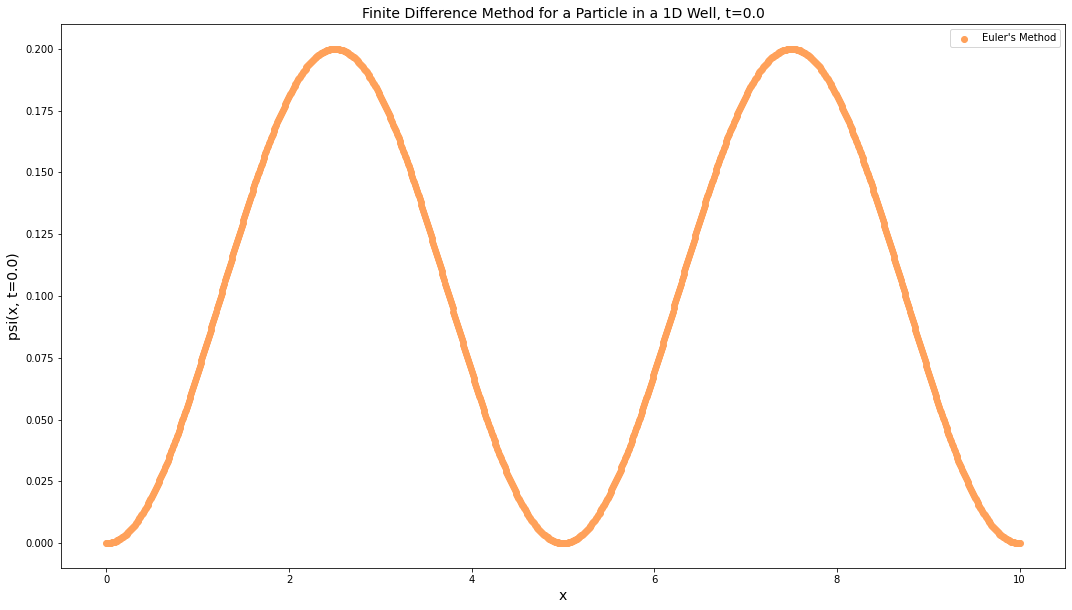

1
1e-07


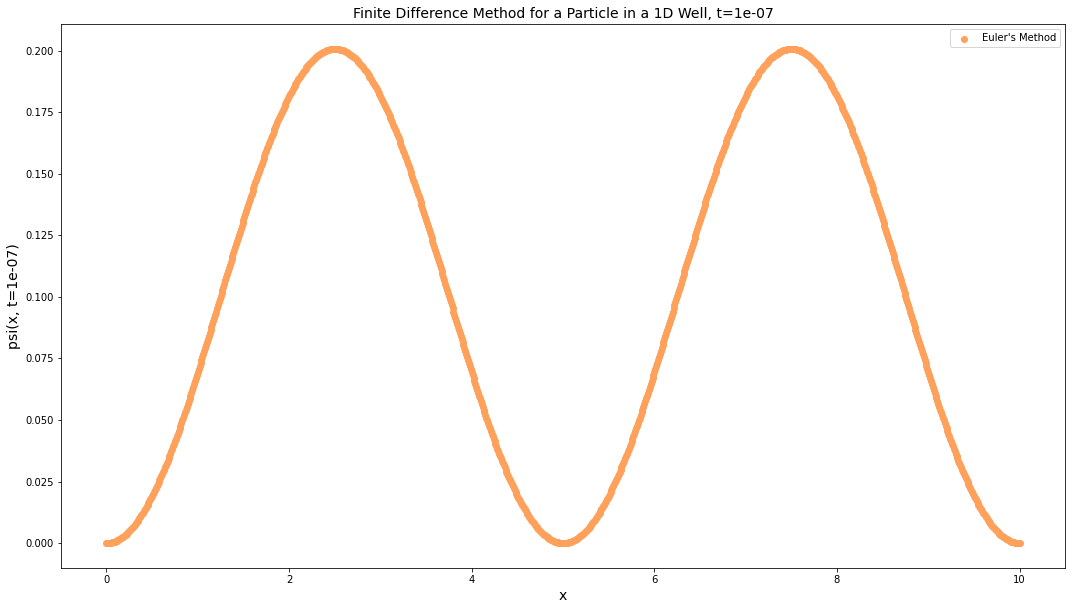

2
1e-07


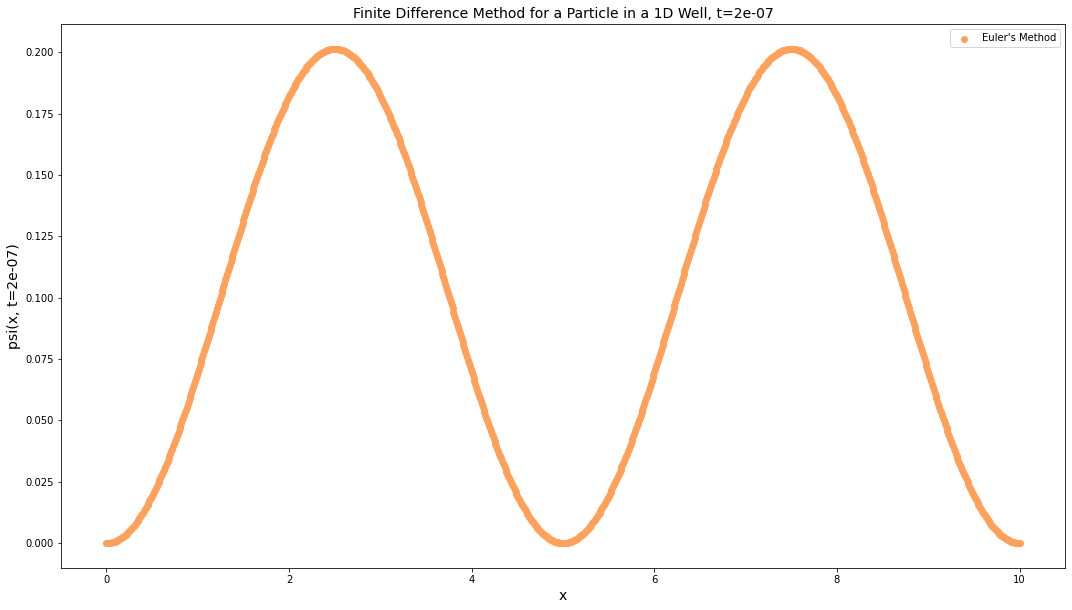

3
1e-07


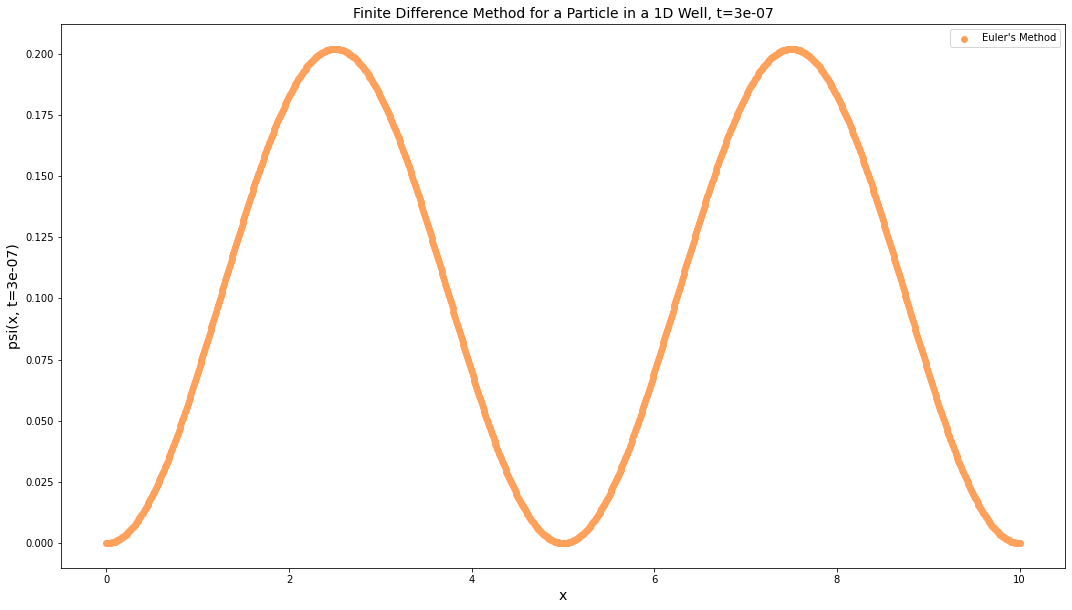

4
1e-07


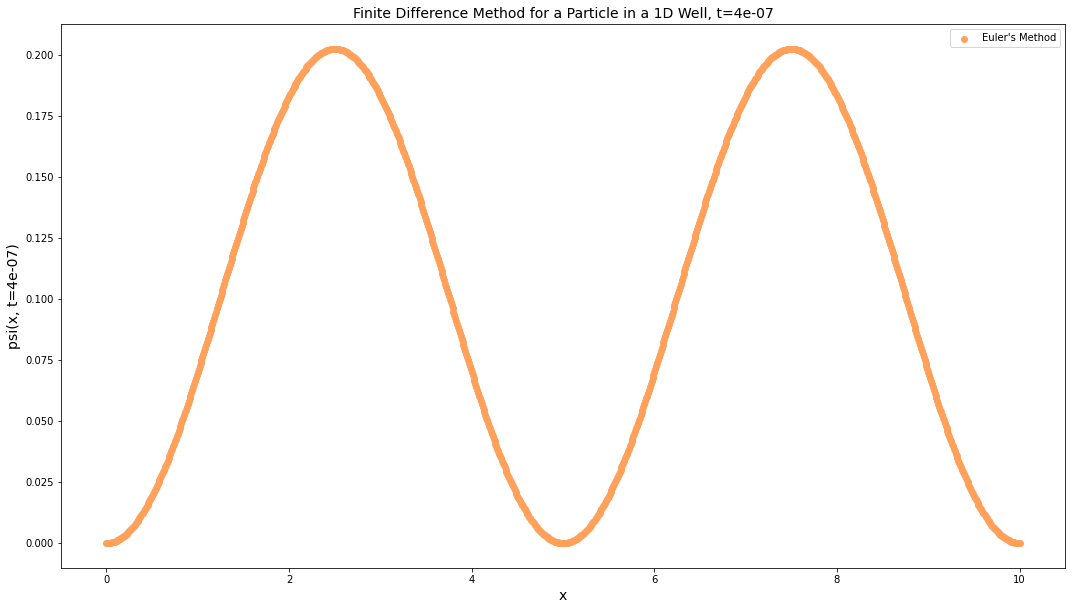

5
1e-07


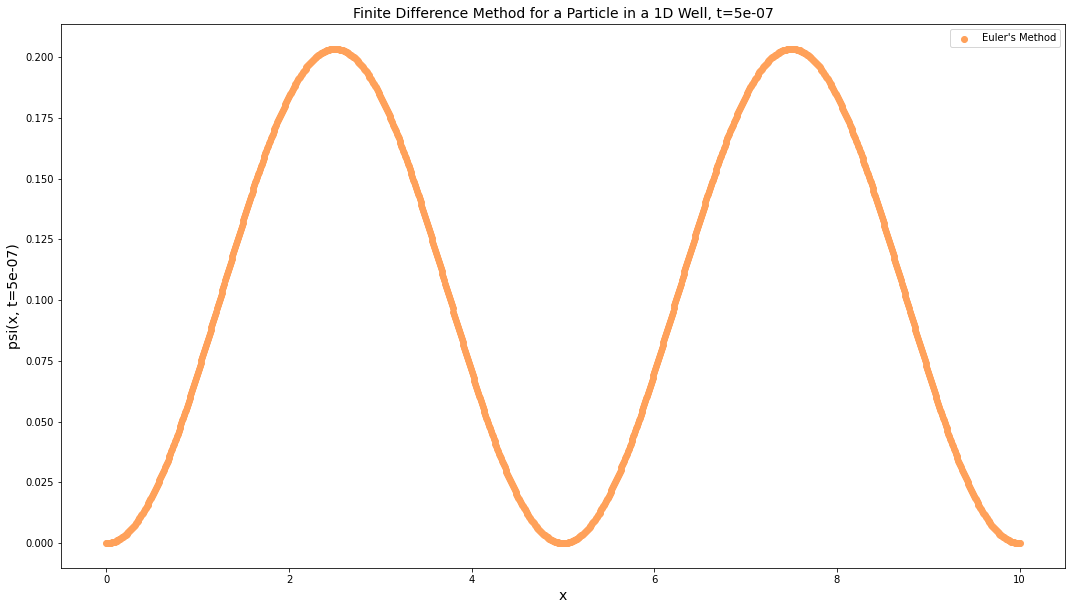

6
1e-07


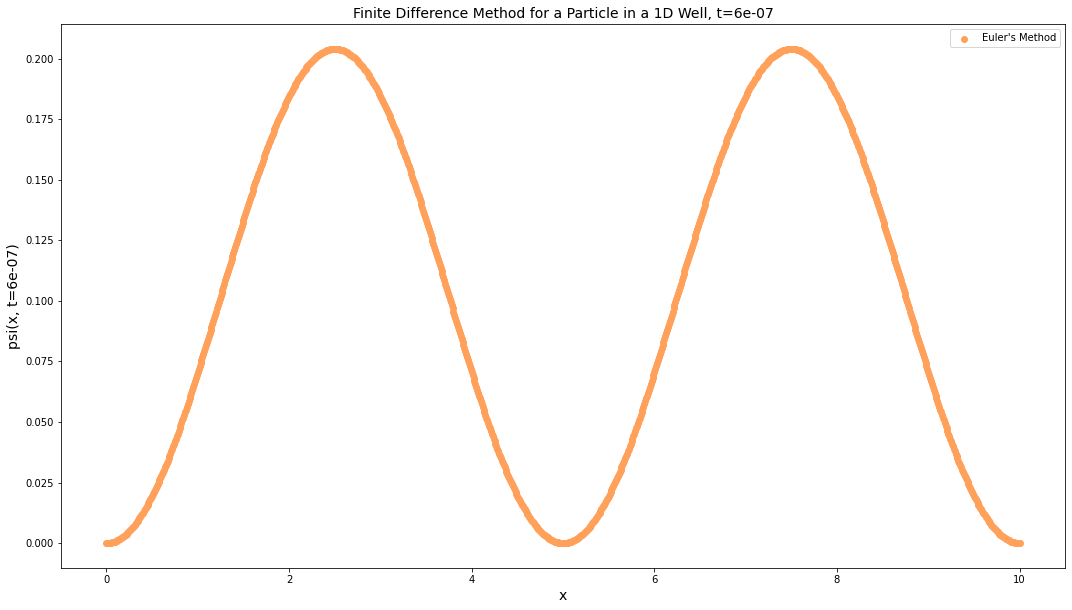

7
1e-07


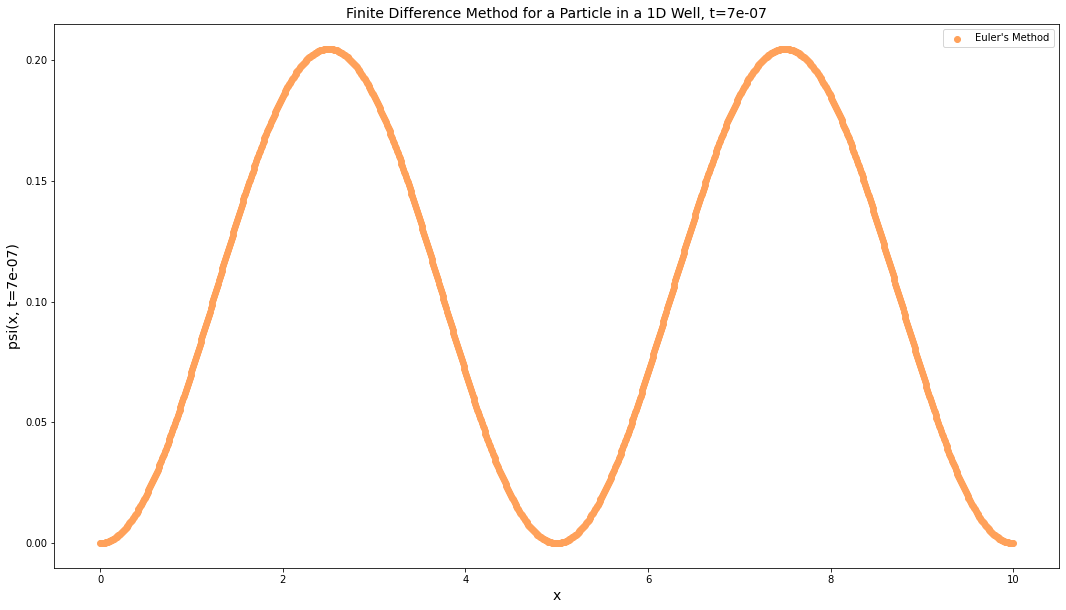

8
1e-07


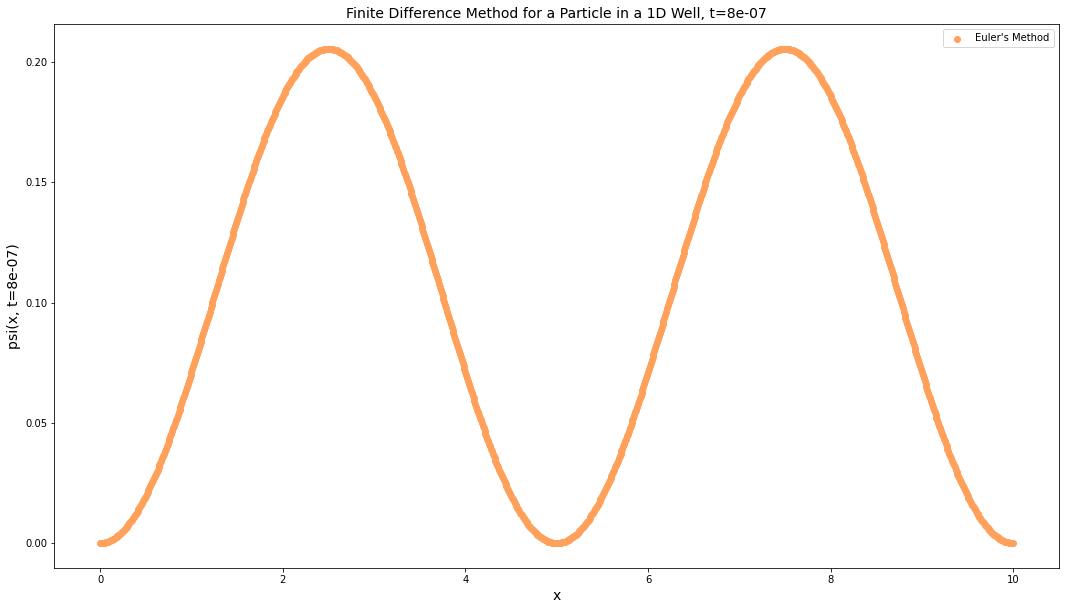

9
1e-07


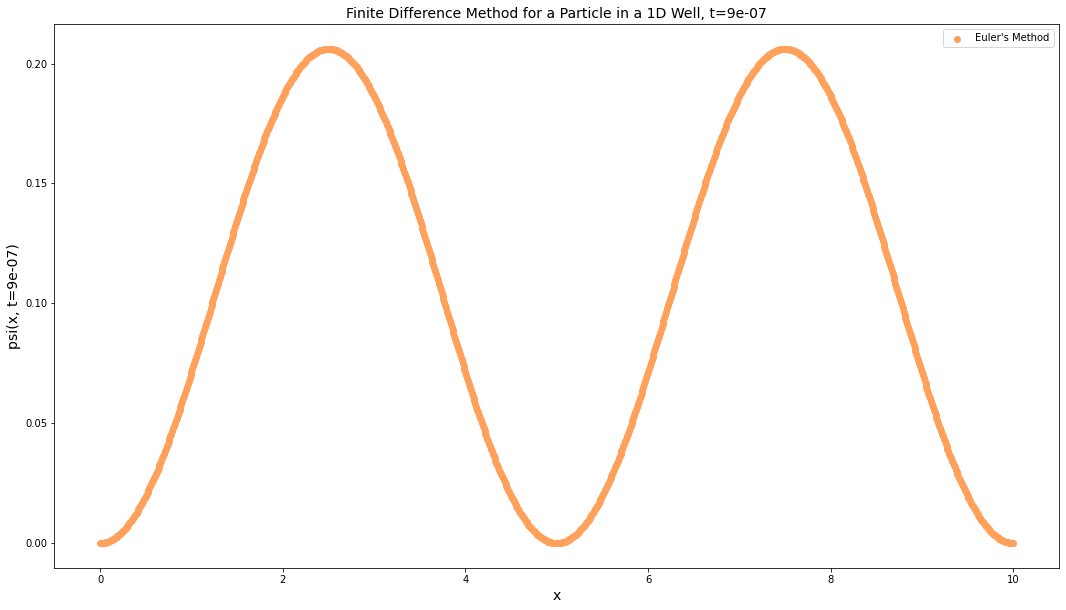

9
1e-07


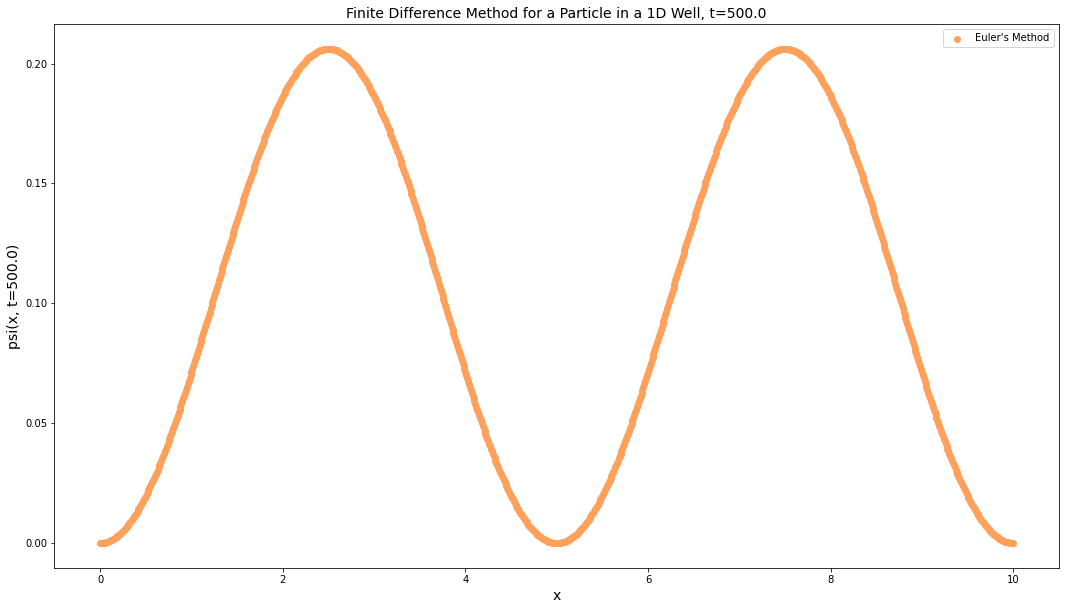

In [52]:
parameters = {'axes.labelsize': 14,
          'axes.titlesize': 14}
plt.rcParams.update(parameters)

for k in range(0, 10):

    fig = plt.figure(figsize=(18,10))

    t = k*dt
    print(k)
    print(dt)
    psi_pred = [psi.conjugate()*psi for psi in U[k]]

    plt.scatter(x_data, psi_pred, label="Euler's Method", color="#FFA15A")
    # plt.scatter(t_data, x_data, label="Analytical Solution", color="#636EFA")
    plt.legend(loc="upper right")

    plt.xlabel("x")
    plt.ylabel(f"psi(x, t={t})")
    plt.title(f"Finite Difference Method for a Particle in a 1D Well, t={t}")
    plt.show()
    



fig = plt.figure(figsize=(18,10))

t = K/2
print(k)
print(dt)
psi_pred = [psi.conjugate()*psi for psi in U[k]]

plt.scatter(x_data, psi_pred, label="Euler's Method", color="#FFA15A")
# plt.scatter(t_data, x_data, label="Analytical Solution", color="#636EFA")
plt.legend(loc="upper right")

plt.xlabel("x")
plt.ylabel(f"psi(x, t={t})")
plt.title(f"Finite Difference Method for a Particle in a 1D Well, t={t}")
plt.show()

## Hydrogen Atom, Radial Equation, Time-Independent

In [3]:
h_bar = 1.054571817*10**-34 # reduced Planck constant
m = 9.1093837015*10**-31 # mass of an electron
alpha = -h_bar**2/(2*m)
E = -2.1789*10**-18
q = -1.60*10**-19
epsilon_0 = 8.85*10**-12
k = q**2/(4*np.pi*epsilon_0)
a = (4*np.pi*epsilon_0*h_bar**2)/(m*q**2)

In [69]:
h_bar = 1 # reduced Planck constant
m = 1 # mass of an electron
alpha = -h_bar**2/(2*m)
E = -1
q = -1
k = q**2
a = 1

In [104]:
def psi_0(r):
    return (1/(np.pi*a**3)**0.5)*np.exp(-r/a)

def psi_deriv_0(r):
    return (1/(np.pi*a**3)**0.5)*(-1/a)*np.exp(-r/a)

In [151]:
dr = 10**-12
n_iterations = 10000000
# u_0 = 1/np.sqrt(np.pi*a**3)
# z_0 = -1/(a*np.sqrt(np.pi*a**3))
# u_0 = 10**-40
# z_0 = 10**-40
r_0 = 0.001
u_0 = psi_0(r_0)
z_0 = psi_deriv_0(r_0)
l = 0

In [152]:
def beta(r, k, alpha, l, E):
    return k/(alpha*r) + l*(l+1)/(r**2) + E/alpha

In [153]:
def eulers_method(k, r_0, dr, alpha, l, E, u_0, z_0, n_iterations):
    u = u_0
    z = z_0
    r = r_0
    u_data = [u]
    r_data = [r]
    for n in range(0, n_iterations):
        A = np.zeros((2, 2))
        A[1][0] = beta(r, k, alpha, l, E)
        A[0][1] = 1
        x = [u, z]
        y = np.matmul(A, x)
        u = u + y[0]*dr
        z = z + y[1]*dr
        r = r + dr
        u_data.append(u)
        r_data.append(r)
    return u_data, r_data
    

In [ ]:
u_data, r_data = eulers_method(k, r_0, dr, alpha, l, E, u_0, z_0, n_iterations)

plt.plot(r_data, u_data, label="Euler's Method", color="#FFA15A")
plt.plot(r_data, [psi_0(r) for r in r_data], label="Analytical Solution", color="#636EFA")
plt.legend(loc="upper right")

plt.xlabel("r")
plt.ylabel(f"u(r)")
plt.title(f"Euler's Method for Hydrogen Atom, l={l}")
plt.show()

In [91]:
def get_A(r, k, alpha, l, E):
    A = np.zeros((2, 2))
    A[1][0] = beta(r, k, alpha, l, E)
    A[0][1] = 1
    return A

def kn1(r, dr, u, z, k, alpha, l, E):
    A = get_A(r, k, alpha, l, E)
    x = [u, z]
    return np.matmul(A, x)

def kn2(r, dr, u, z, k, alpha, l, E):
    A = get_A(r + dr/2, k, alpha, l, E)
    slope = kn1(r, dr, u, z, k, alpha, l, E)
    u = u + (dr/2)*slope[0]
    z = z + (dr/2)*slope[1]
    x = [u, z]
    return np.matmul(A, x)

def kn3(r, dr, u, z, k, alpha, l, E):
    A = get_A(r + dr/2, k, alpha, l, E)
    slope = kn2(r, dr, u, z, k, alpha, l, E)
    u = u + (dr/2)*slope[0]
    z = z + (dr/2)*slope[1]
    x = [u, z]
    return np.matmul(A, x)

def kn4(r, dr, u, z, k, alpha, l, E):
    A = get_A(r + dr, k, alpha, l, E)
    slope = kn3(r, dr, u, z, k, alpha, l, E)
    u = u + (dr/2)*slope[0]
    z = z + (dr/2)*slope[1]
    x = [u, z]
    return np.matmul(A, x)

In [92]:
def runge_kutta_four(k, r_0, dr, alpha, l, E, u_0, z_0, n_iterations):
    u = u_0
    z = z_0
    r = r_0 + 10**-40
    u_data = [u]
    r_data = [r]
    for n in range(0, n_iterations):
        y = (kn1(r, dr, u, z, k, alpha, l, E) + 2*kn2(r, dr, u, z, k, alpha, l, E) + 2*kn3(r, dr, u, z, k, alpha, l, E) + kn4(r, dr, u, z, k, alpha, l, E))/6
        u = u + y[0]*dr
        z = z + y[1]*dr
        r = r + dr
        u_data.append(u)
        r_data.append(r)
    return u_data, r_data
    

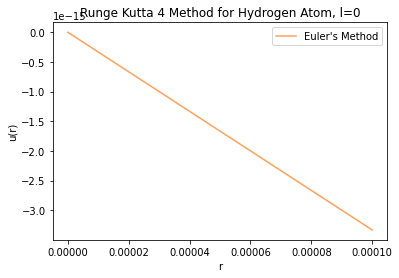

In [98]:
dr = 10**-10
n_iterations = 1000000
l = 0
u_data, r_data = runge_kutta_four(k, 0, dr, alpha, l, E, u_0, z_0, n_iterations)

plt.plot(r_data, u_data, label="Euler's Method", color="#FFA15A")
# plt.scatter(t_data, x_data, label="Analytical Solution", color="#636EFA")
plt.legend(loc="upper right")

plt.xlabel("r")
plt.ylabel(f"u(r)")
plt.title(f"Runge Kutta 4 Method for Hydrogen Atom, l={l}")
plt.show()